In [106]:
import pandas as pd
import geopandas as gpd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   
import os

Now that we have all the weather files downloaded, let's concat them into one big dataframe:

In [3]:
all_df = []
#list all the files from the directory
file_list = os.listdir('Data/Weather_Daily')


Below I'll be looking through my `Data/Weather_Daily` folder and grabbing the file names of all the csv to add them into a list. This is so that I can later start concatinating the csvs together. 

In [5]:
for file in file_list:
    df = pd.read_csv(f'Data/Weather_Daily/{file}',encoding='unicode_escape')
    all_df.append(df)



In [6]:
Concat_table = pd.concat(all_df)

/var/folders/g4/w2hwfpc1681072qk9l2n84600000gn/T/ipykernel_1124/619429562.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  Concat_table = pd.concat(all_df)


In [7]:
Concat_table.head()

,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time,Year,Month,Day,Data Quality,Max Temp (°C),...,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
0,-109.2,53.45,BUTTE ST PIERRE,4041000,1993-11-01,1993,11,1,NaN,6.0,...,0.0,T,0.0,T,0.0,NaN,NaN,NaN,NaN,NaN
1,-109.2,53.45,BUTTE ST PIERRE,4041000,1993-11-02,1993,11,2,NaN,3.5,...,9.0,NaN,9.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2,-109.2,53.45,BUTTE ST PIERRE,4041000,1993-11-03,1993,11,3,NaN,-1.0,...,7.0,NaN,7.0,NaN,9.0,NaN,NaN,NaN,NaN,NaN
3,-109.2,53.45,BUTTE ST PIERRE,4041000,1993-11-04,1993,11,4,NaN,-5.0,...,0.0,T,0.0,T,15.0,NaN,NaN,NaN,NaN,NaN
4,-109.2,53.45,BUTTE ST PIERRE,4041000,1993-11-05,1993,11,5,NaN,-7.0,...,0.0,NaN,0.0,NaN,15.0,NaN,NaN,NaN,NaN,NaN


We can see below that right now, we have 4,634,086 rows and 31 columns. 

In [8]:
Concat_table.shape

(4634086, 31)

Let's look at the column names and see what we have:

In [11]:
Concat_table.columns

Index(['Longitude (x)', 'Latitude (y)', 'Station Name', 'Climate ID',
       'Date/Time', 'Year', 'Month', 'Day', 'Data Quality', 'Max Temp (°C)',
       'Max Temp Flag', 'Min Temp (°C)', 'Min Temp Flag', 'Mean Temp (°C)',
       'Mean Temp Flag', 'Heat Deg Days (°C)', 'Heat Deg Days Flag',
       'Cool Deg Days (°C)', 'Cool Deg Days Flag', 'Total Rain (mm)',
       'Total Rain Flag', 'Total Snow (cm)', 'Total Snow Flag',
       'Total Precip (mm)', 'Total Precip Flag', 'Snow on Grnd (cm)',
       'Snow on Grnd Flag', 'Dir of Max Gust (10s deg)',
       'Dir of Max Gust Flag', 'Spd of Max Gust (km/h)',
       'Spd of Max Gust Flag'],
      dtype='object')

Now let's look at how much of what we have in that table is null values, and duplicated: 

In [15]:
Concat_table.isna().sum()

Longitude (x)                      0
Latitude (y)                       0
Station Name                       0
Climate ID                         0
Date/Time                          0
Year                               0
Month                              0
Day                                0
Data Quality                 3661801
Max Temp (°C)                 510760
Max Temp Flag                4447420
Min Temp (°C)                 508635
Min Temp Flag                4443238
Mean Temp (°C)                702281
Mean Temp Flag               4353290
Heat Deg Days (°C)            702281
Heat Deg Days Flag           4353290
Cool Deg Days (°C)            702281
Cool Deg Days Flag           4353290
Total Rain (mm)               836266
Total Rain Flag              3992336
Total Snow (cm)               811268
Total Snow Flag              4004708
Total Precip (mm)             425957
Total Precip Flag            4118988
Snow on Grnd (cm)             993549
Snow on Grnd Flag            4345484
D

In [17]:
Concat_table.duplicated().sum()

0

In [31]:
Concat_table.dtypes

KeyError: 'date'

In [23]:
Concat_table['Date']=pd.to_datetime(Concat_table[['Year','Month','Day']])

In [24]:
Concat_table.head()

,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time,Year,Month,Day,Data Quality,Max Temp (°C),...,Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag,Date
0,-109.2,53.45,BUTTE ST PIERRE,4041000,1993-11-01,1993,11,1,NaN,6.0,...,T,0.0,T,0.0,NaN,NaN,NaN,NaN,NaN,1993-11-01
1,-109.2,53.45,BUTTE ST PIERRE,4041000,1993-11-02,1993,11,2,NaN,3.5,...,NaN,9.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,1993-11-02
2,-109.2,53.45,BUTTE ST PIERRE,4041000,1993-11-03,1993,11,3,NaN,-1.0,...,NaN,7.0,NaN,9.0,NaN,NaN,NaN,NaN,NaN,1993-11-03
3,-109.2,53.45,BUTTE ST PIERRE,4041000,1993-11-04,1993,11,4,NaN,-5.0,...,T,0.0,T,15.0,NaN,NaN,NaN,NaN,NaN,1993-11-04
4,-109.2,53.45,BUTTE ST PIERRE,4041000,1993-11-05,1993,11,5,NaN,-7.0,...,NaN,0.0,NaN,15.0,NaN,NaN,NaN,NaN,NaN,1993-11-05


Let's now set the Date as the index, this will help us with merging the with the final modelling table later on. 

In [26]:
Concat_table.set_index('Date',inplace=True)

Let's also work on changing the Data types of the data we have, so that we can measure their colinearity down the line.

In [44]:
Concat_table=Concat_table.convert_dtypes({'Max Temp (°C)':'float',
       'Min Temp (°C)':'float', 'Mean Temp (°C)':'float','Heat Deg Days (°C)':'float',
       'Cool Deg Days (°C)':'float', 'Total Rain (mm)':'float','Total Snow (cm)':'float',
       'Total Precip (mm)':'float', 'Snow on Grnd (cm)':'float'})

In [50]:
Concat_table.dtypes

Longitude (x)                       Float64
Latitude (y)                        Float64
Station Name                 string[python]
Climate ID                           object
Date/Time                    string[python]
Year                                  Int64
Month                                 Int64
Day                                   Int64
Data Quality                 string[python]
Max Temp (°C)                       Float64
Max Temp Flag                string[python]
Min Temp (°C)                       Float64
Min Temp Flag                string[python]
Mean Temp (°C)                      Float64
Mean Temp Flag               string[python]
Heat Deg Days (°C)                  Float64
Heat Deg Days Flag           string[python]
Cool Deg Days (°C)                  Float64
Cool Deg Days Flag           string[python]
Total Rain (mm)                     Float64
Total Rain Flag              string[python]
Total Snow (cm)                     Float64
Total Snow Flag              str

In [48]:
Concat_table.sample(10)

,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time,Year,Month,Day,Data Quality,Max Temp (°C),...,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
Date,,,,,,,,,,,,,,,,,,,,,
2006-05-07,-116.98,51.3,GOLDEN A,1173210,2006-05-07,2006,5,7,<NA>,16.2,...,0.0,<NA>,0.8,<NA>,0,<NA>,<NA>,<NA>,NaN,<NA>
2012-09-30,-124.9,49.72,COMOX A,1021830,2012-09-30,2012,9,30,<NA>,15.5,...,0.0,<NA>,0.0,T,0,<NA>,<NA>,<NA>,<31,<NA>
1997-08-08,-124.66,48.86,NITINAT RIVER HATCHERY,1035612,1997-08-08,1997,8,8,<NA>,24.5,...,0.0,<NA>,0.0,<NA>,0,<NA>,<NA>,<NA>,NaN,<NA>
2017-04-03,-71.53,45.37,SAWYERVILLE NORD,7027802,2017-04-03,2017,4,3,<NA>,8.5,...,4.2,<NA>,4.2,<NA>,0,T,<NA>,<NA>,NaN,<NA>
2015-10-29,-124.05,48.83,LAKE COWICHAN,1012055,2015-10-29,2015,10,29,¿,15.5,...,0.0,<NA>,17.8,<NA>,0,<NA>,<NA>,<NA>,NaN,<NA>
2016-03-30,-88.91,50.29,ARMSTRONG (AUT),6040325,2016-03-30,2016,3,30,<NA>,10.5,...,<NA>,M,0.0,<NA>,24,<NA>,<NA>,<NA>,<31,<NA>
2001-02-12,-72.68,45.07,SUTTON,7028292,2001-02-12,2001,2,12,<NA>,-4.0,...,0.0,<NA>,0.0,<NA>,35,<NA>,<NA>,<NA>,NaN,<NA>
2015-01-25,-124.05,48.83,LAKE COWICHAN,1012055,2015-01-25,2015,1,25,¿,13.5,...,0.0,<NA>,31.2,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,<NA>
2019-06-13,-125.0,49.76,COURTENAY GRANTHAM,1021988,2019-06-13,2019,6,13,¿,<NA>,...,<NA>,<NA>,<NA>,<NA>,0,<NA>,<NA>,<NA>,NaN,<NA>


Now, let's merge our daily weather data into monthly data, getting the monthly average of all the weather measurements collected. We're doing this to be able to predict wheather a fire is likely to occur by month, rather than within a day. This allows for our model to be a little more accurate since the outcome is generalized into a month. 

In [94]:
monthly_df = Concat_table.groupby(['Climate ID','Longitude (x)','Latitude (y)'])[['Max Temp (°C)',
       'Min Temp (°C)', 'Mean Temp (°C)','Heat Deg Days (°C)',
       'Cool Deg Days (°C)', 'Total Rain (mm)','Total Snow (cm)',
       'Total Precip (mm)', 'Snow on Grnd (cm)']].resample('ME').mean().reset_index()

In [113]:
Concat_table.duplicated().sum()

0

We can see below that the total rows are now 160,667!

In [55]:
monthly_df.shape

(160667, 11)

In [96]:
monthly_df.head()

,Climate ID,Longitude (x),Latitude (y),Date,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm)
0,1011500,-123.74,48.94,1991-07-31,22.741935,13.177419,17.983871,0.729032,0.712903,1.019355,0.0,1.019355,0.0
1,1011500,-123.74,48.94,1991-08-31,22.370968,13.919355,18.174194,0.993548,1.167742,4.280645,0.0,4.280645,0.0
2,1011500,-123.74,48.94,1991-09-30,20.3,11.183333,15.763333,2.396667,0.16,0.1,0.0,0.1,0.0
3,1011500,-123.74,48.94,1991-10-31,13.467742,5.951613,9.73871,8.26129,0.0,1.06129,0.43871,1.5,0.645161
4,1011500,-123.74,48.94,1991-11-30,9.816667,4.366667,7.113333,10.886667,0.0,8.8,0.0,8.8,0.0


Let's take a look at our missing data:

In [97]:
for i in range(len(monthly_df.columns)):
    na_index=monthly_df.isna().sum().index[i]
    na_ratio=monthly_df.isna().sum().iloc[i]
    print(f'{na_index} has {round((na_ratio/160667)*100,2)}% missing data')


Climate ID has 0.0% missing data
Longitude (x) has 0.0% missing data
Latitude (y) has 0.0% missing data
Date has 0.0% missing data
Max Temp (°C) has 11.68% missing data
Min Temp (°C) has 11.66% missing data
Mean Temp (°C) has 14.76% missing data
Heat Deg Days (°C) has 14.76% missing data
Cool Deg Days (°C) has 14.76% missing data
Total Rain (mm) has 18.4% missing data
Total Snow (cm) has 18.98% missing data
Total Precip (mm) has 9.56% missing data
Snow on Grnd (cm) has 19.18% missing data


We can see that the most data missing is `Snow on Grnd (cm)` which is still under 25% of our dataset. We can certainly work with the missing data we have, either by extrapulating or dropping those points all together. We'll make that decision in our modelling section

Let's now take a look at the colinearity of our columns:

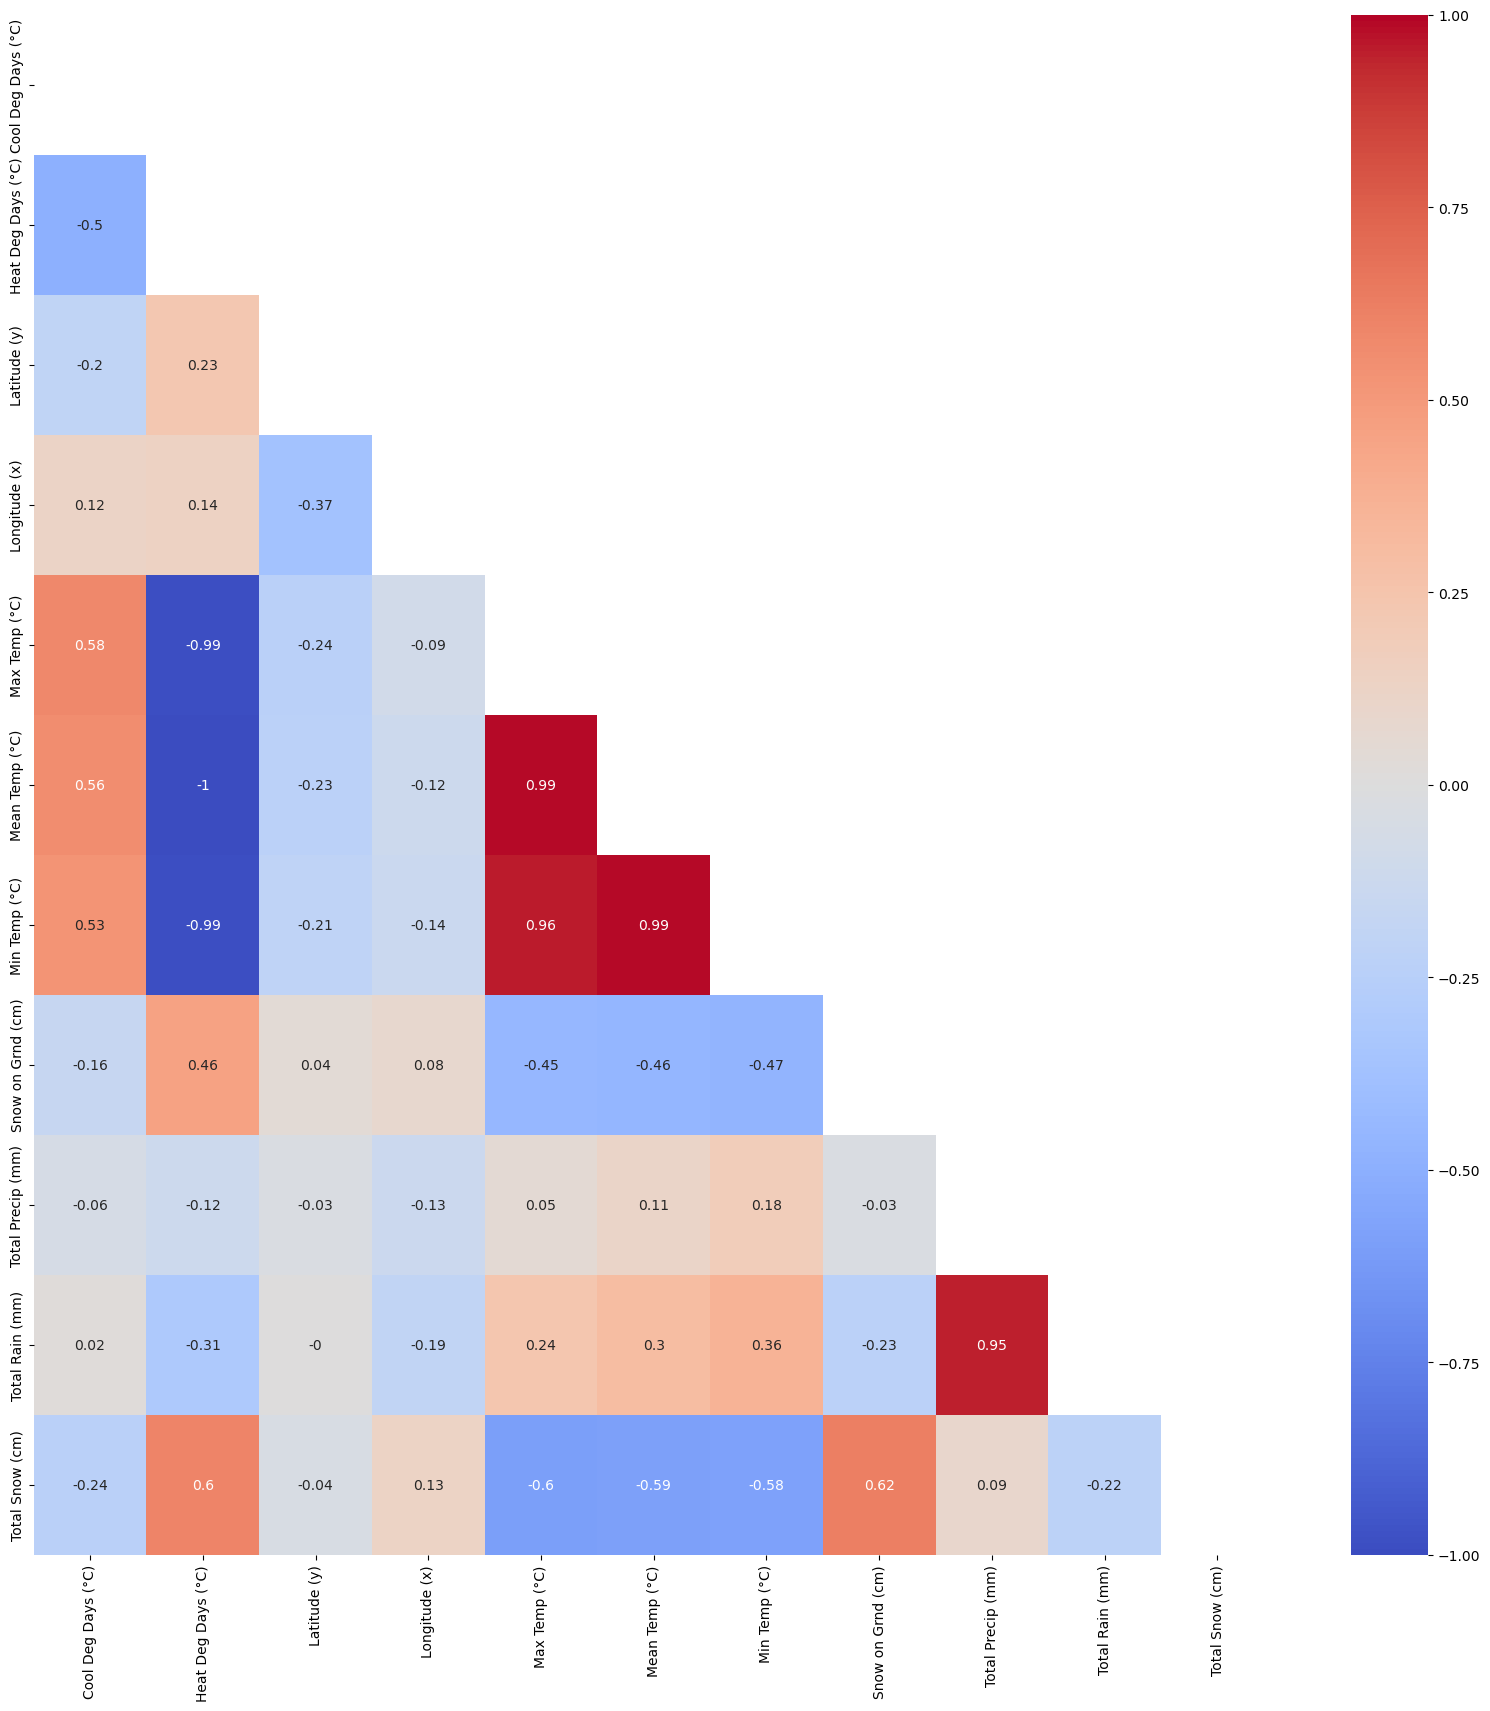

In [98]:
X=monthly_df.loc[:, monthly_df.columns.difference(['Date','Climate ID'])]
# Calculate all the correlations between each independent variable
corr_df = X.corr()

# Mask for upper-triangular
mask = np.triu(corr_df)

# Visualize with seaborn
plt.figure(figsize=(20, 20))
sns.heatmap(corr_df.round(2), annot=True, vmax=1, vmin=-1, center=0, cmap='coolwarm', mask=mask)
plt.show()


We can see some high colinearities above. Based on the chart, we can drop the following: 

- `Max Temp (°C)`- We already have the mean temp calculated, so we won't need the Max or min temps
- `Min Temp (°C)`- We already have the mean temp calculated, so we won't need the Max or min temps
- `Total Rain (mm)` - Total Rain and total precip are highly correlated, let's only look at precipitation since there is less missing data there. 

Let's drop these 3 for now and see how the correlations change. 


In [99]:
monthly_df.drop(columns=['Max Temp (°C)','Min Temp (°C)','Total Rain (mm)'],inplace=True,axis=1)

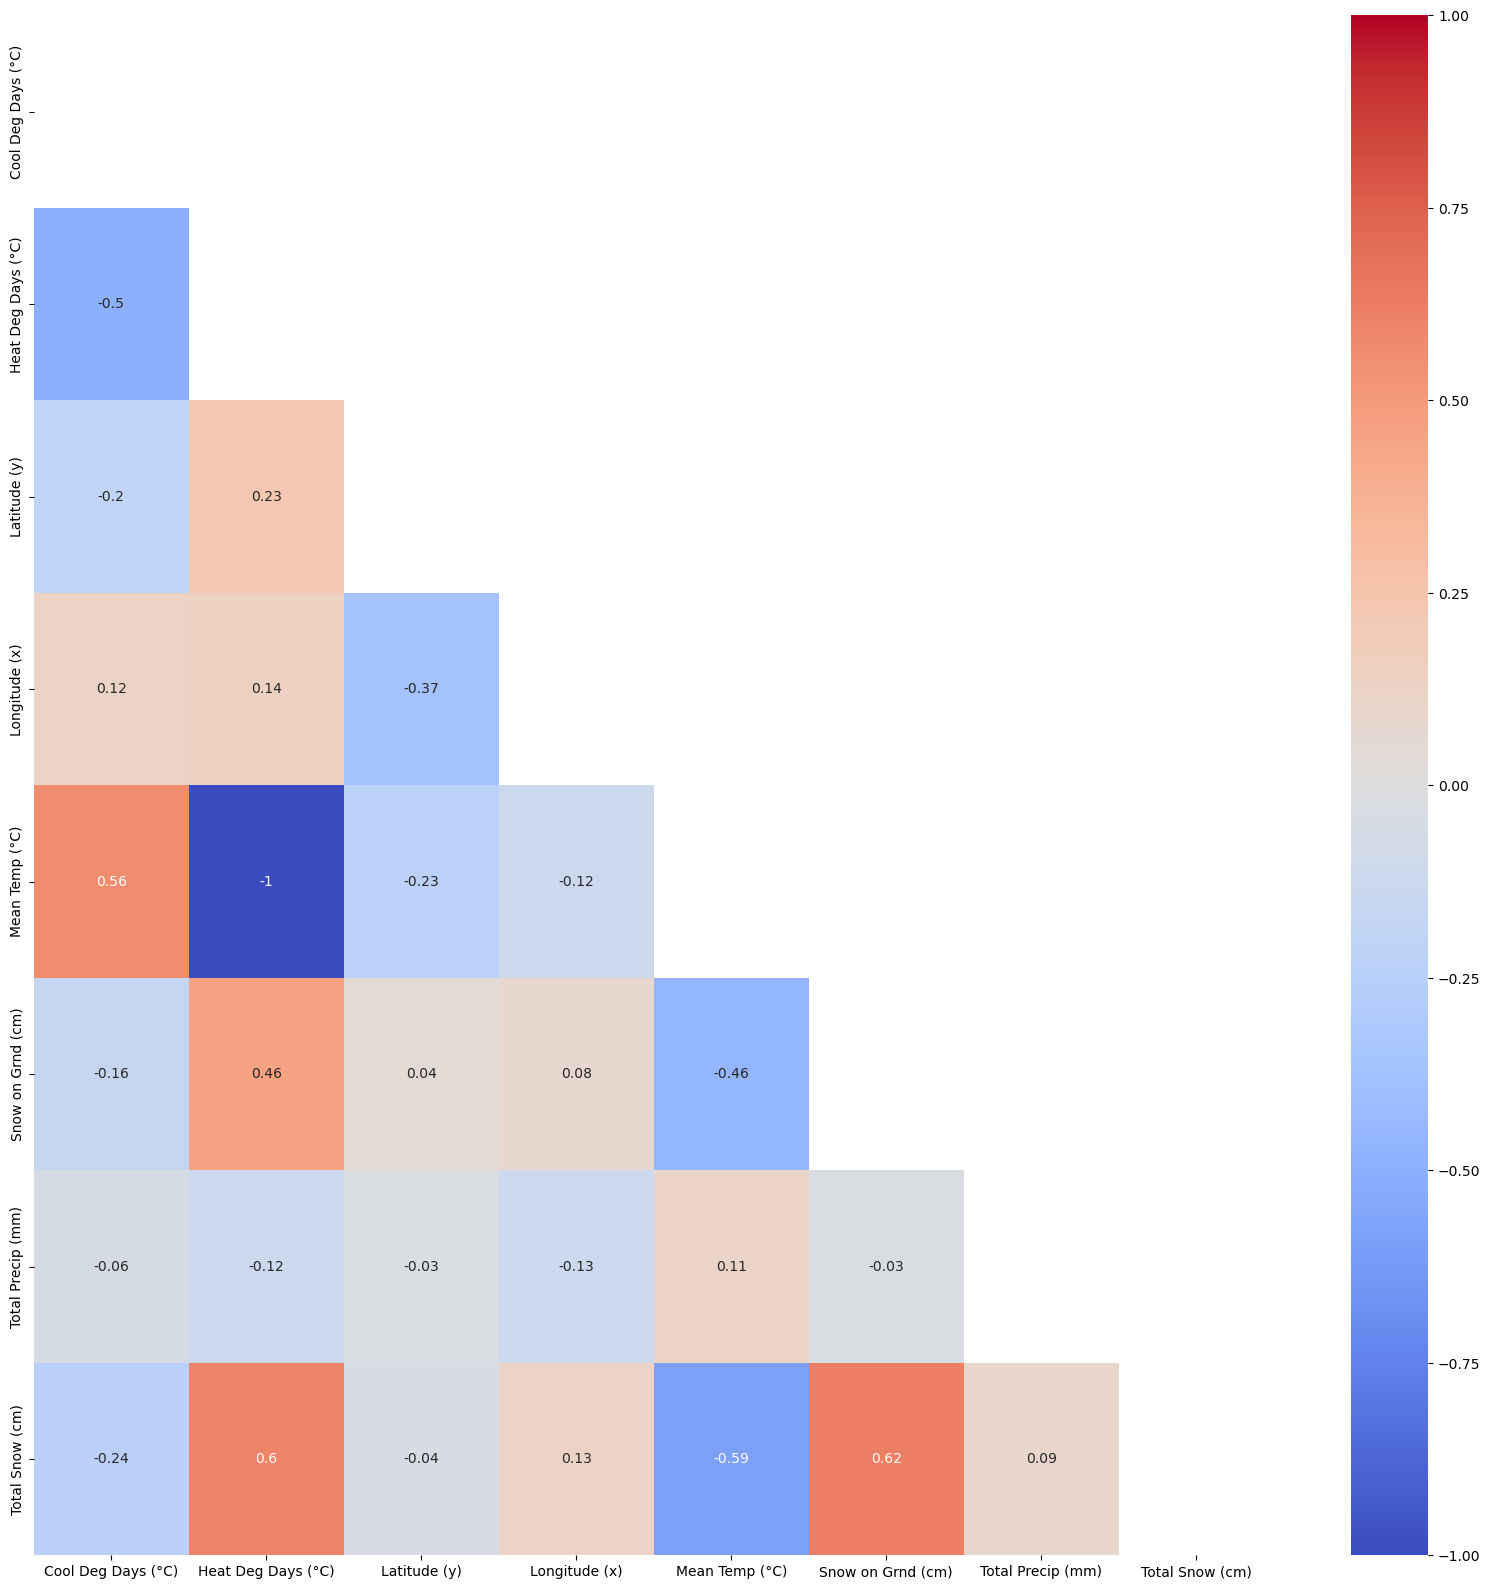

In [100]:
X=monthly_df.loc[:, monthly_df.columns.difference(['Date','Climate ID'])]

# Calculate all the correlations between each independent variable
corr_df = X.corr()

# Mask for upper-triangular
mask = np.triu(corr_df)

# Visualize with seaborn
plt.figure(figsize=(20, 20))
sns.heatmap(corr_df.round(2), annot=True, vmax=1, vmin=-1, center=0, cmap='coolwarm', mask=mask)
plt.show()


Climate ID has 0.0% missing data
Date has 0.0% missing data
Max Temp (°C) has 11.16% missing data
Min Temp (°C) has 11.14% missing data
Mean Temp (°C) has 14.24% missing data
 has 14.24% missing data
Cool Deg Days (°C) has 14.24% missing data
Total Rain (mm) has 17.88% missing data
Total Snow (cm) has 18.46% missing data
Total Precip (mm) has 9.04% missing data
Snow on Grnd (cm) has 18.66% missing data


Let's now drop the following columns:

- `Heat Deg Days (°C)` - high correlation with `Total Snow (cm)` and `Mean Temp (°C)`
- `Snow on Grnd (cm)` -  we already have a `Total Snow (cm)` column that gives us the same information
- `Cool Deg Days (°C)` - We already have temperature measured within `Mean Temp (°C)`

In [101]:
monthly_df.drop(columns=['Heat Deg Days (°C)','Snow on Grnd (cm)','Cool Deg Days (°C)'],inplace=True,axis=1)


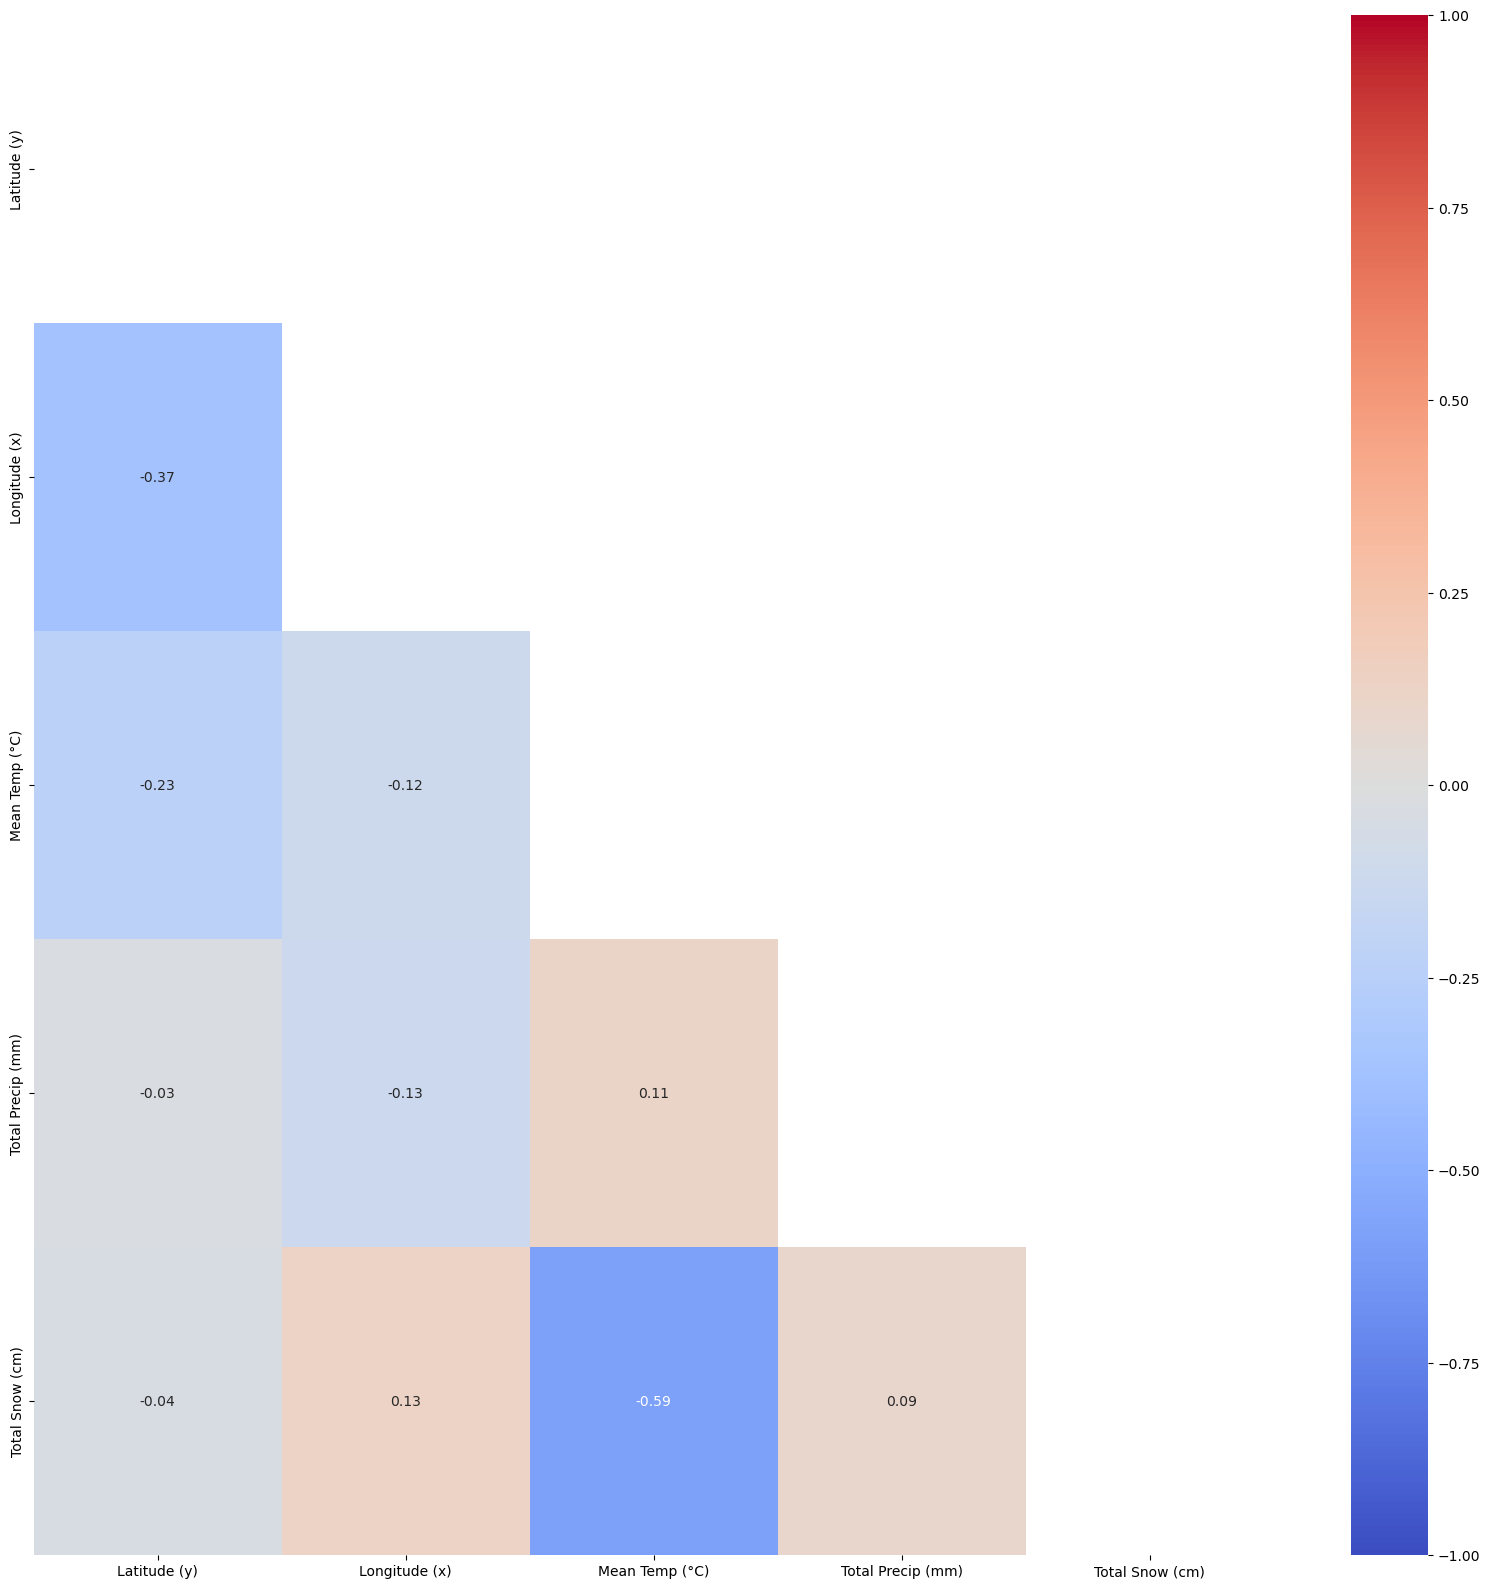

In [102]:
X=monthly_df.loc[:, monthly_df.columns.difference(['Date','Climate ID'])]

# Calculate all the correlations between each independent variable
corr_df = X.corr()

# Mask for upper-triangular
mask = np.triu(corr_df)

# Visualize with seaborn
plt.figure(figsize=(20, 20))
sns.heatmap(corr_df.round(2), annot=True, vmax=1, vmin=-1, center=0, cmap='coolwarm', mask=mask)
plt.show()


Even though there is a correlation of under -0.5 between `Mean Temp (°C)` and `Total Snow (cm)`, I do want to keep them both as we want to look at how less/more snow within the year impacts whether there will be a fire or not. 

In [103]:
monthly_df.to_csv('Data/Monthly_Weather_Data/monthly_weather.csv')

Let's also make an SHP file of the dataframe we created, to maybe use it to geo plot the station locations. 

In [110]:
weather_shp=gpd.GeoDataFrame(monthly_df,geometry=gpd.points_from_xy(monthly_df['Longitude (x)'],monthly_df['Latitude (y)']),crs='esri:102009')

In [118]:
weather_shp= weather_shp.loc[:,['Climate ID','geometry']].drop_duplicates()

In [119]:
weather_shp.shape

(429, 2)

In [120]:
weather_shp.to_file('Data/Weather_shp/weather_data.shp')